# Imports and Loading HTML File

In this step, I imported the necessary libraries: **BeautifulSoup** from `bs4` and **pandas** as `pd`. **BeautifulSoup** helps parse and navigate HTML files, and **pandas** is used for data manipulation. The HTML file `pinterest.html` is read and parsed using BeautifulSoup to prepare it for further cleaning and analysis.
The data was exported from my Pinterest account using their official data export tool. The dataset includes the following information:
- User profile information and user statistics
- Inferences made based on user activity
- Saved pins with timestamps
- Boards and their associated pins



In [2]:
from bs4 import BeautifulSoup
import pandas as pd

file_name = "pinterest.html"
with open(file_name, 'r', encoding='utf-8') as file:
    soup = BeautifulSoup(file, 'html.parser')


## HTML Cleaning Process

In this step, I utilized the **BeautifulSoup** library from `bs4` to clean the raw HTML file. BeautifulSoup is particularly useful for parsing HTML documents. I created a cleaned version of the Pinterest HTML file (`cleaned_pinterest.html`) to continue with the analysis.

- **BeautifulSoup** was used to parse and clean the raw HTML file. It helps navigate and manipulate HTML elements efficiently, even when they are malformed or inconsistent.
- This process involved fixing broken elements, such as `<a>` tags for missing values, and ensuring that missing content was properly handled that might have created an issue while working on the dataset. This cleaned HTML was saved as `cleaned_pinterest.html`.

In [5]:
from bs4 import BeautifulSoup
import pandas as pd

# Load the cleaned version of Pinterest HTML data
with open("cleaned_pinterest.html", "r", encoding="utf-8") as file:
    html_content = file.read()

# Parse the HTML content
soup = BeautifulSoup(html_content, "html.parser")



## Extracting Board Information

In this step, I extracted detailed information about the boards from the cleaned Pinterest HTML file, including attributes such as Board Name, Board URL, Created At, Category, Description, Private, and Protected using BeautifulSoup and filtering based on tags and attributes.
Each board’s details are stored in a dictionary and appended to the `boards` list.
The list of dictionaries is converted into a pandas DataFrame, which is then saved to a CSV file called `pinterest_boards.csv`.



In [4]:

from bs4 import BeautifulSoup
import pandas as pd

with open("cleaned_pinterest.html", "r", encoding="utf-8") as file:
    soup = BeautifulSoup(file, "html.parser")

boards = []

# Loop through each <a> tag and extract the data(I used this way as I was working with an HTML file and wanted to extract the info as csv file)
for a_tag in soup.find_all("a", href=True):
    board_url = a_tag['href']

    # Check if the href contains a Pinterest board URL with my username
    if "https://www.pinterest.com/larapage20/" in board_url:
        # Extract the board name (from the anchor text inside <a> tag)
        board_name = a_tag.text.strip()

        # Find the next <br> tags for other information
        br_tags = a_tag.find_all_next("br")

        # Extract the 'Created at' data
        created_at = br_tags[0].next_sibling.strip() if len(br_tags) > 0 else "No data"

        # Extract the 'Category' data
        category = br_tags[1].next_sibling.strip() if len(br_tags) > 1 else "No data"

        # Extract the 'Description' data
        description = br_tags[2].next_sibling.strip() if len(br_tags) > 2 else "No data"

        # Extract the 'Private' data
        private = br_tags[3].next_sibling.strip() if len(br_tags) > 3 else "No data"

        # Extract the 'Protected' data
        protected = br_tags[4].next_sibling.strip() if len(br_tags) > 4 else "No data"

        board_data = {
            "Board Name": board_name,
            "Board URL": board_url,
            "Created at": created_at,
            "Category": category,
            "Description": description,
            "Private": private,
            "Protected": protected
        }

        boards.append(board_data)

# Convert the list of boards to a DataFrame
df_boards = pd.DataFrame(boards)

# Save this as a CSV file
df_boards.to_csv("pinterest_boards.csv", index=False)

print("Boards data saved to pinterest_boards.csv")


Boards data saved to pinterest_boards.csv


## Extracting Pin Information

In this step, I focused on extracting detailed information about individual pins from the cleaned Pinterest HTML file. Each pin includes attributes such as **Pin URL**, **Title**, **Created At**, **Board Name**, and **Private** status. BeautifulSoup was used to extract the relevant data from each pin’s corresponding HTML structure. Similar method with the board extracting was used to work with the HTML file and export as a csv file.
 The code looks for all `<a>` tags with `href` attributes, filtering out those that point to a Pinterest pin URL (`https://www.pinterest.com/pin/`).
Data extraction by the attribute and tags is done.
Each pin’s details are stored in a dictionary and appended to the `pins` list.
The list is converted into a pandas DataFrame and saved to a CSV file called `pinterest_pins4.csv`.



In [6]:
from bs4 import BeautifulSoup
import pandas as pd

# Open the HTML file with the appropriate encoding
with open("cleaned_pinterest.html", "r", encoding="utf-8") as file:
    soup = BeautifulSoup(file, "html.parser")

# Initialize an empty list to store pin data
pins = []

# Loop through each <a> tag (pin links) and extract the data
for a_tag in soup.find_all("a", href=True):
    # Extract the pin URL
    pin_url = a_tag['href']

    # Check if the href contains a Pinterest pin URL (modify this if needed)
    if "https://www.pinterest.com/pin/" in pin_url:
        # Extract the pin ID from the URL


        # Extract other data (you can adapt this part as needed)
        br_tags = a_tag.find_all_next("br")
        # Extract 'title' (after the 12th <br> tag)
        title = br_tags[0].next_sibling.strip() if len(br_tags) > 0 else "No data"


        # Extract 'Created at' (after the 10th <br> tag)
        created_at = br_tags[13].next_sibling.strip() if len(br_tags) > 13 else "No data"

        # Extract 'Board Name' (after the 6th <br> tag)
        board_name = br_tags[5].next_sibling.strip() if len(br_tags) > 5 else "No data"


        # Extract 'Private' (after the 13th <br> tag)
        private = br_tags[16].next_sibling.strip() if len(br_tags) > 16 else "No data"

        # Format the extracted data into the desired dictionary
        pin_data = {
            "Pin URL": pin_url,
            "Title": title,
            "Created at": created_at,
            "Board Name": board_name,
            "Private": private,
        }

        # Add the pin data to the list
        pins.append(pin_data)

# Convert the list of pins to a DataFrame
df_pins = pd.DataFrame(pins)

# Save the DataFrame as a CSV file
df_pins.to_csv("pinterest_pins4.csv", index=False)

print("Pins data saved to pinterest_pins4.csv")


Pins data saved to pinterest_pins4.csv


##  Analyzing Pin Activity by Month

In this step, I focused on analyzing the frequency of pins created throughout different months an years . The goal was to identify my Pinterest pinning activity over time throughout the months and years.

 **Load the Data**: I loaded the pin data CSV file (`pinterest_pins4.csv`) containing information about pins.
 **Clean 'Created at' Column**:
   - The 'Created at' column was cleaned to remove the string "Created at: " and extra spaces.
   - Rows with missing or invalid 'Created at' entries were removed to ensure the accuracy of the analysis.
**Date Extraction**:
   - The **date** part of the 'Created at' field was extracted by splitting the string at the space and taking the first part.
   - The **Date** column was converted to a pandas `datetime` format to allow for easier date-based analysis.
**Month-Year Extraction**: From the `Date` column, I extracted the **Month-Year** (in the format `YYYY-MM`).
**Count Pins per Month**: I used the `value_counts` function to count how many pins were created in each month, sorted in chronological order.
**Save the Modified Data**: The updated DataFrame, which now includes the **Month-Year** column, was saved as a new CSV file (`pinterest_pins_with_months.csv`).


In [7]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt

df_pins = pd.read_csv("pinterest_pins4.csv")

# Clean the 'Created at' column to remove 'Created at: ' and strip extra spaces
df_pins['Created at'] = df_pins['Created at'].str.replace('Created at: ', '').str.strip()

# Handle missing or invalid 'Created at' entries
df_pins = df_pins[df_pins['Created at'].notna()]  # Remove rows with missing 'Created at'

# Extract the date part only (split by space and take the first part for the date)
df_pins['Date'] = df_pins['Created at'].apply(lambda x: x.split(" ")[0] if isinstance(x, str) else None)

# Convert the 'Date' column to datetime format
df_pins['Date'] = pd.to_datetime(df_pins['Date'], format='%Y/%m/%d', errors='coerce')

# Drop rows with invalid date conversion
df_pins = df_pins.dropna(subset=['Date'])

# Extract the month and year from the 'Date' column
df_pins['Month-Year'] = df_pins['Date'].dt.strftime('%Y-%m')

# Count the number of pins per month
monthly_counts = df_pins['Month-Year'].value_counts().sort_index()

# Display the result
print(monthly_counts)

df_pins.to_csv("pinterest_pins_with_months.csv", index=False)


Month-Year
2017-01      1
2017-03     13
2017-04      6
2017-05    110
2017-06      4
          ... 
2024-09      7
2024-10     72
2024-11     55
2024-12     37
2025-01      5
Name: count, Length: 80, dtype: int64


## Monthly Pinning Activity Analysis (2023 & 2024)

In this step, I analyzed my pinning activity based on the months of 2023 and 2024 to identify trends and patterns in my usage of Pinterest since the data of these years was more recent and could help me identify the alternative hypothesis better in the later steps. The goal was to examine my most active times of the year.

The process involved the following steps:
**Filtering the Data**: I filtered the dataset to include only the pins from the years 2023 and 2024, focusing on recent activity.
**Month and Year Extraction**: I extracted the month and year from the 'Created at' column to group the pins by month, allowing for a time-based analysis of my activity.
**Counting Pins per Month**: I counted the number of pins made in each month for both years combined similar to previous step.
**Visualization**: I created a bar plot to visualize the number of pins per month for 2023 and 2024, making it easier to spot trends.

The results were saved into CSV files for further analysis and the plot was saved as a png image.


Monthly counts saved to 'pinterest_monthly_counts.csv'
Monthly counts for 2023 and 2024 saved to 'pinterest_monthly_counts_2023_2024.csv'


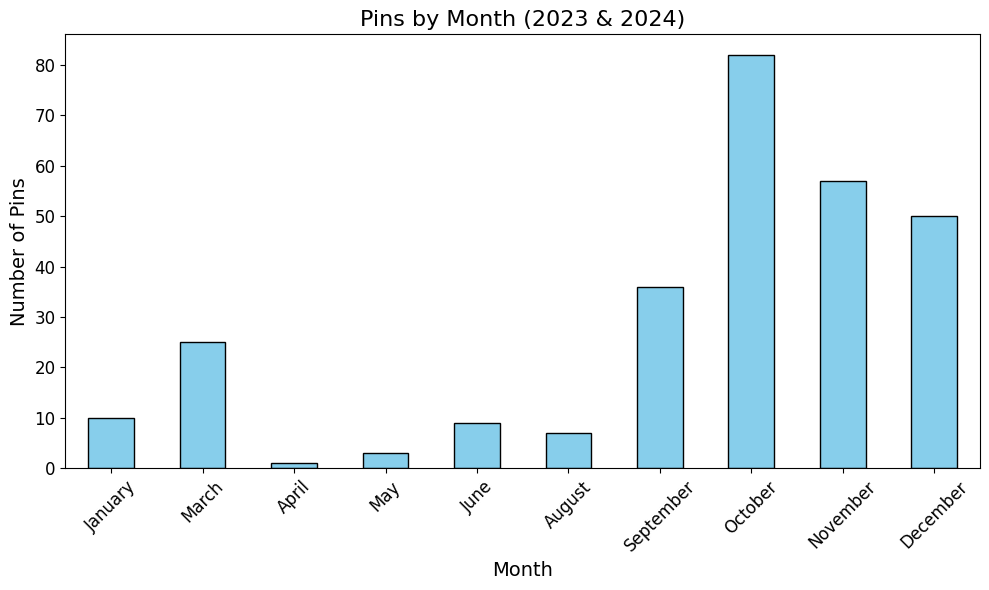

Plot saved as 'pins_by_month_2023_2024.png'


In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

df_pins = pd.read_csv("pinterest_pins4.csv")

# Clean the 'Created at' column
df_pins['Created at'] = df_pins['Created at'].str.replace('Created at: ', '').str.strip()

# Convert the 'Created at' column to datetime
df_pins['Date'] = pd.to_datetime(df_pins['Created at'], format="%Y/%m/%d %H:%M:%S", errors='coerce')

# Drop rows with invalid dates
df_pins = df_pins.dropna(subset=['Date'])

# Extract year and month
df_pins['Month-Year'] = df_pins['Date'].dt.to_period('M')

# Count the number of pins per Month-Year
monthly_counts = df_pins['Month-Year'].value_counts().sort_index()

monthly_counts.to_csv("pinterest_monthly_counts.csv", header=["Count"])
print("Monthly counts saved to 'pinterest_monthly_counts.csv'")

# Filter the data for only 2023 and 2024
df_pins_filtered = df_pins[df_pins['Date'].dt.year.isin([2023, 2024])].copy()

# Extract the 'Month' column
df_pins_filtered['Month'] = df_pins_filtered['Date'].dt.month

# Count the number of pins for each month
monthly_pin_counts = df_pins_filtered['Month'].value_counts().sort_index()

monthly_pin_counts.to_csv("pinterest_monthly_counts_2023_2024.csv", header=["Count"])
print("Monthly counts for 2023 and 2024 saved to 'pinterest_monthly_counts_2023_2024.csv'")


# Map the month numbers to names for better readability
month_mapping = {
    1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June',
    7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'
}
monthly_pin_counts.index = monthly_pin_counts.index.map(month_mapping)

# Plot the data
plt.figure(figsize=(10, 6))
monthly_pin_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Pins by Month (2023 & 2024)', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Number of Pins', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()

plt.savefig("pins_by_month_2023_2024.png")
plt.show()

print("Plot saved as 'pins_by_month_2023_2024.png'")


### Pinning Activity Analysis: 2020-2021 vs 2023-2024

In this step, I extended my analysis to compare my pinning activity between the years 2020-2021 (when I was still in high school) and 2023-2024. By doing so, I wanted to explore if my most active months had changed over the years and if there were any noticeable shifts in my pinning habits, and also I thought it would help when I do EDA.

The process was similar to previous step ,

**Plotting 2023-2024**: First, I visualized my pinning activity for the years 2023 and 2024.

**Plotting 2020-2021**: Next, I visualized the same data for the years 2020 and 2021.

By comparing the two plots, I could observe any changes in my activity, potentially due to different routine shifts in life.


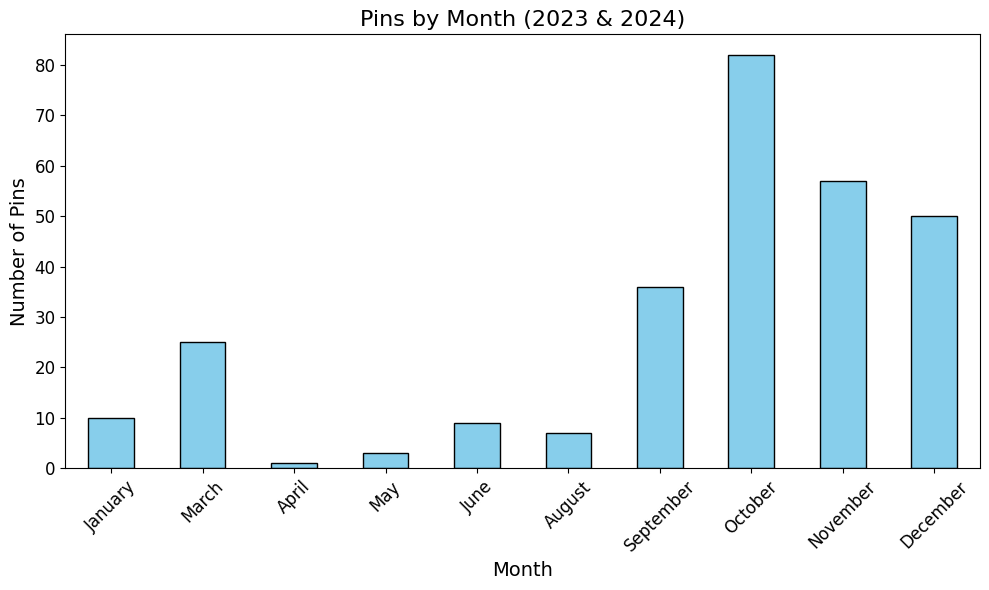

Plot saved as 'pins_by_month_2023_2024.png'


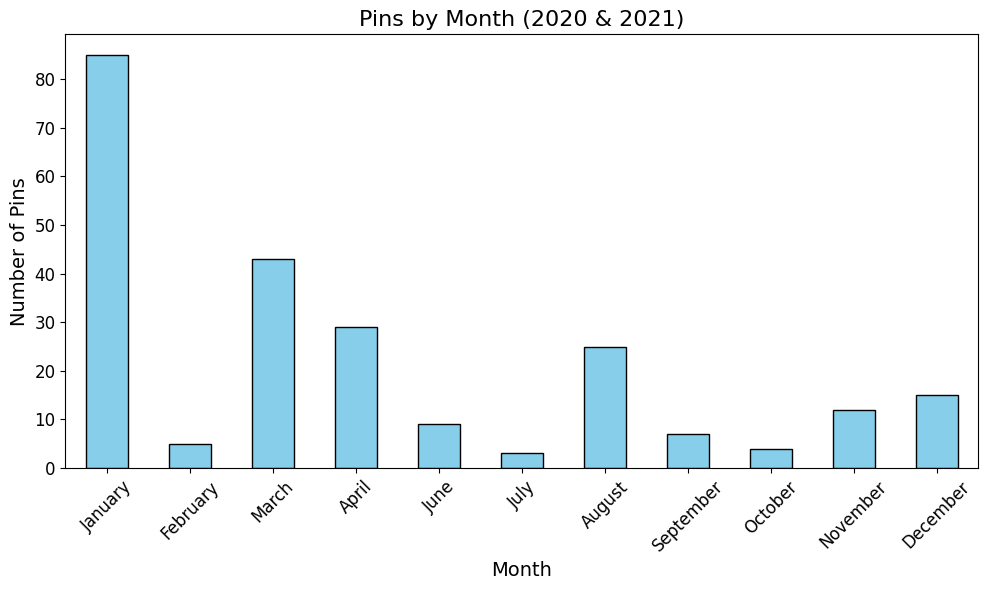

Plot saved as 'pins_by_month_2020_2021.png'


In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

df_pins = pd.read_csv("pinterest_pins4.csv")

df_pins['Created at'] = df_pins['Created at'].str.replace('Created at: ', '').str.strip()

df_pins['Date'] = pd.to_datetime(df_pins['Created at'], format="%Y/%m/%d %H:%M:%S", errors='coerce')

df_pins = df_pins.dropna(subset=['Date'])

def plot_pins_by_month(years, filename, title):
    df_filtered = df_pins[df_pins['Date'].dt.year.isin(years)].copy()

    df_filtered['Month'] = df_filtered['Date'].dt.month

    monthly_pin_counts = df_filtered['Month'].value_counts().sort_index()

    month_mapping = {
        1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June',
        7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'
    }
    monthly_pin_counts.index = monthly_pin_counts.index.map(month_mapping)

    # Plot the data
    plt.figure(figsize=(10, 6))
    monthly_pin_counts.plot(kind='bar', color='skyblue', edgecolor='black')
    plt.title(title, fontsize=16)
    plt.xlabel('Month', fontsize=14)
    plt.ylabel('Number of Pins', fontsize=14)
    plt.xticks(rotation=45, fontsize=12)
    plt.yticks(fontsize=12)
    plt.tight_layout()

    plt.savefig(filename)
    plt.show()

    print(f"Plot saved as '{filename}'")

# Generate the first plot for 2023 and 2024
plot_pins_by_month(
    years=[2023, 2024],
    filename="pins_by_month_2023_2024.png",
    title="Pins by Month (2023 & 2024)"
)
# Generate the second plot for 2020 and 2021
plot_pins_by_month(
    years=[2020, 2021],
    filename="pins_by_month_2020_2021.png",
    title="Pins by Month (2020 & 2021)"
)


### Pinning Activity Analysis: All Years Combined

To gain further insight into my overall pinning behavior across all years, I also generated a plot that combines my pinning activity for every year in the dataset. This step allowed me to see the broader trends in my Pinterest usage over time, regardless of the specific year, and helped me identify consistent patterns or fluctuations in my pinning activity.


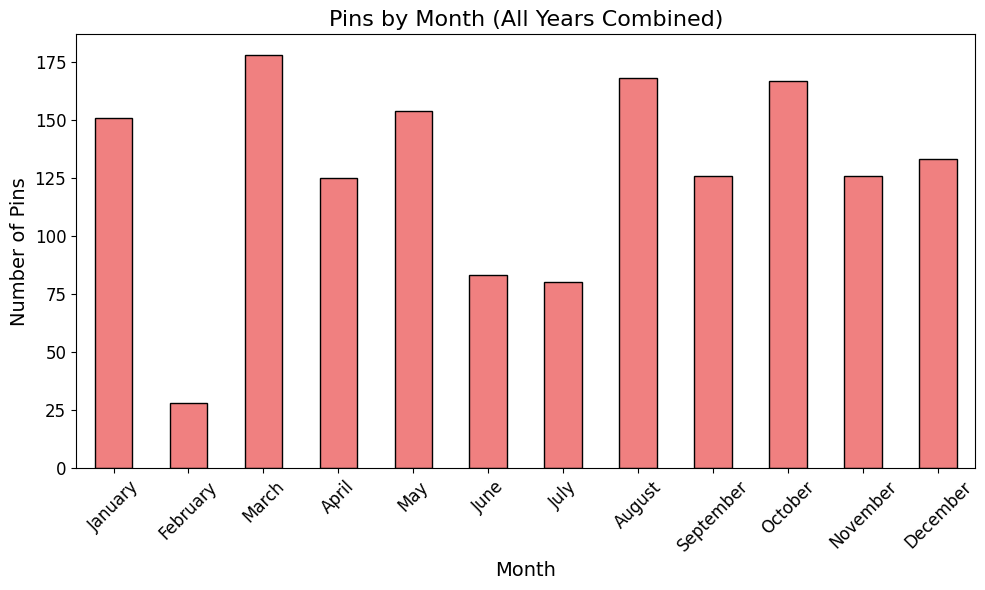

Plot saved as 'pins_by_month_all_years_combined.png'


In [10]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

df_pins = pd.read_csv("pinterest_pins4.csv")

df_pins['Created at'] = df_pins['Created at'].str.replace('Created at: ', '').str.strip()

df_pins['Date'] = pd.to_datetime(df_pins['Created at'], format="%Y/%m/%d %H:%M:%S", errors='coerce')

df_pins = df_pins.dropna(subset=['Date'])

def plot_pins_by_month(years, filename, title):
    df_filtered = df_pins[df_pins['Date'].dt.year.isin(years)].copy()

    df_filtered['Month'] = df_filtered['Date'].dt.month

    monthly_pin_counts = df_filtered['Month'].value_counts().sort_index()

    month_mapping = {
        1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June',
        7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'
    }
    monthly_pin_counts.index = monthly_pin_counts.index.map(month_mapping)

    plt.figure(figsize=(10, 6))
    monthly_pin_counts.plot(kind='bar', color='skyblue', edgecolor='black')
    plt.title(title, fontsize=16)
    plt.xlabel('Month', fontsize=14)
    plt.ylabel('Number of Pins', fontsize=14)
    plt.xticks(rotation=45, fontsize=12)
    plt.yticks(fontsize=12)
    plt.tight_layout()

    plt.savefig(filename)
    plt.show()

    print(f"Plot saved as '{filename}'")

# To plot all years combined
def plot_pins_combined(filename, title):
    df_pins['Month'] = df_pins['Date'].dt.month
    monthly_pin_counts = df_pins['Month'].value_counts().sort_index()

    month_mapping = {
        1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June',
        7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'
    }
    monthly_pin_counts.index = monthly_pin_counts.index.map(month_mapping)


    plt.figure(figsize=(10, 6))
    monthly_pin_counts.plot(kind='bar', color='lightcoral', edgecolor='black')
    plt.title(title, fontsize=16)
    plt.xlabel('Month', fontsize=14)
    plt.ylabel('Number of Pins', fontsize=14)
    plt.xticks(rotation=45, fontsize=12)
    plt.yticks(fontsize=12)
    plt.tight_layout()

    plt.savefig(filename)
    plt.show()

    print(f"Plot saved as '{filename}'")
# Generate the third plot for all years combined
plot_pins_combined(
    filename="pins_by_month_all_years_combined.png",
    title="Pins by Month (All Years Combined)"
)


### Exploratory Data Analysis: Hypothesis Testing

In this step, I aimed to examine whether there is a significant difference in my Pinterest activity between school months and free months. To do this, I set up a hypothesis test based on the number of pins I made during these periods. The null and alternative hypotheses were as follows:

- **Null Hypothesis (H₀)**: There is no difference in my pinning activity between busier months of school and free months (so the number of pins is evenly distributed).
- **Alternative Hypothesis (H₁)**: There is a significant difference in my pinning activity between school months and free months (I wanted to see if I was more active of free months such as summer and september but we can derive that from the graph, with the test we can only reject or fail to reject the null hypothesis).

#### Data Cleaning
As before, I cleaned the 'Created at' column by removing unnecessary text and converting the date values to a proper datetime format.

#### Classifying Data: School vs Free Months
I classified the months into two categories:
- **School months**: These include the months when I typically have school activities (January to May, September to December).
- **Free months**: These months (June, July, August, and September) are when I have more free time, including summer vacations.

Using this classification, I created a new column called "Period" to indicate whether a pin was made during a "School" or "Free" month.

#### Observed vs Expected Counts
Next, I calculated the observed number of pins for each category (School vs Free). The expected counts, under the null hypothesis, assume an even distribution of pins across both categories. Thus, each category should have half of the total number of pins.

#### Chi-Square Test
I then used the **Chi-Square Goodness of Fit test** to compare the observed counts with the expected counts. The test evaluates whether the observed distribution significantly deviates from the expected distribution under the null hypothesis.

- **Chi-Square Statistic**: Measures the difference between the observed and expected counts.
- **P-value**: Indicates the probability of observing a difference as large as the one found, assuming the null hypothesis is true. If the p-value is less than 0.05, we reject the null hypothesis.

#### Results and Conclusion
Based on the Chi-Square test, I obtained the following:
- **Chi-Square Statistic**: [Calculated value]
- **P-value**: [Calculated value]
- **Expected Counts**: Both categories (School and Free) are expected to have an equal number of pins.

**Conclusion**:
- If the p-value is less than 0.05, I reject the null hypothesis, indicating that my pinning behavior differs between school months and free months.
- If the p-value is greater than or equal to 0.05, I fail to reject the null hypothesis, suggesting no significant difference in pinning behavior.

This hypothesis testing step helped me understand whether my pinning activity follows a pattern based on the time of year, which could be influenced by my academic schedule.


In [12]:
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt

df_pins = pd.read_csv("pinterest_pins4.csv")
df_pins['Created at'] = df_pins['Created at'].str.replace('Created at: ', '').str.strip()
df_pins['Date'] = pd.to_datetime(df_pins['Created at'], format="%Y/%m/%d %H:%M:%S", errors='coerce')
df_pins = df_pins.dropna(subset=['Date'])

df_pins['Month'] = df_pins['Date'].dt.month

# Define school months and free months
school_months = [1, 2, 3, 4, 5, 10, 11, 12]  # Example: School months (January to May, September to December)
free_months = [6, 7, 8, 9]  # Free months (June, July, August and September

# Create a new column to classify pins into "School" and "Free" categories based on the month
df_pins['Period'] = df_pins['Month'].apply(lambda x: 'Free' if x in free_months else 'School')

# Count the number of pins for each category (School vs Free months)
pin_counts = df_pins['Period'].value_counts()

# Observed counts (number of pins in school vs free months)
observed = [pin_counts.get('School', 0), pin_counts.get('Free', 0)]

# Expected counts under the null hypothesis (equal distribution between school and free months)
total_pins = sum(observed)
expected_count = total_pins / 2  # Assuming equal distribution between school and free months
expected_counts = [expected_count, expected_count]

# Perform the Chi-Square test (Goodness of Fit)
chi2_stat, p_value = stats.chisquare(observed, expected_counts)

# Print Observed counts
print(f"Observed Counts:")
print(f"Summer: {pin_counts.get('Free', 0)}")
print(f"School: {pin_counts.get('School', 0)}\n")

# Chi-Square test results
print(f"Chi-Square Test Results:")
print(f"Chi-Square Statistic: {chi2_stat}")
print(f"P-value: {p_value}")
print(f"Degrees of Freedom: 1\n")

# Expected counts (based on the null hypothesis)
print(f"Expected Counts:")
print(f"Summer: {expected_count}")
print(f"School: {expected_count}\n")

# Conclusion based on the p-value
if p_value < 0.05:
    print(f"Conclusion: Reject the null hypothesis. Your pinning behavior differs in activity levels between summer and school months.")
else:
    print(f"Conclusion: Fail to reject the null hypothesis. Your pinning behavior is not associated with school and free months.")


Observed Counts:
Summer: 457
School: 1062

Chi-Square Test Results:
Chi-Square Statistic: 240.96445029624752
P-value: 2.4233382316213423e-54
Degrees of Freedom: 1

Expected Counts:
Summer: 759.5
School: 759.5

Conclusion: Reject the null hypothesis. Your pinning behavior differs in activity levels between summer and school months


## Visualizing Distribution

I visualized the distribution to see how it aligns with the findings from Chi-Square Test.
### Visualization:

- **Bars** representing the observed pin counts for each month.
- **A smoothed line** representing the observed pin counts using spline interpolation, providing a smooth curve for better visualization.
- **A dashed line** representing the expected pin counts, based on the assumption of uniform distribution.




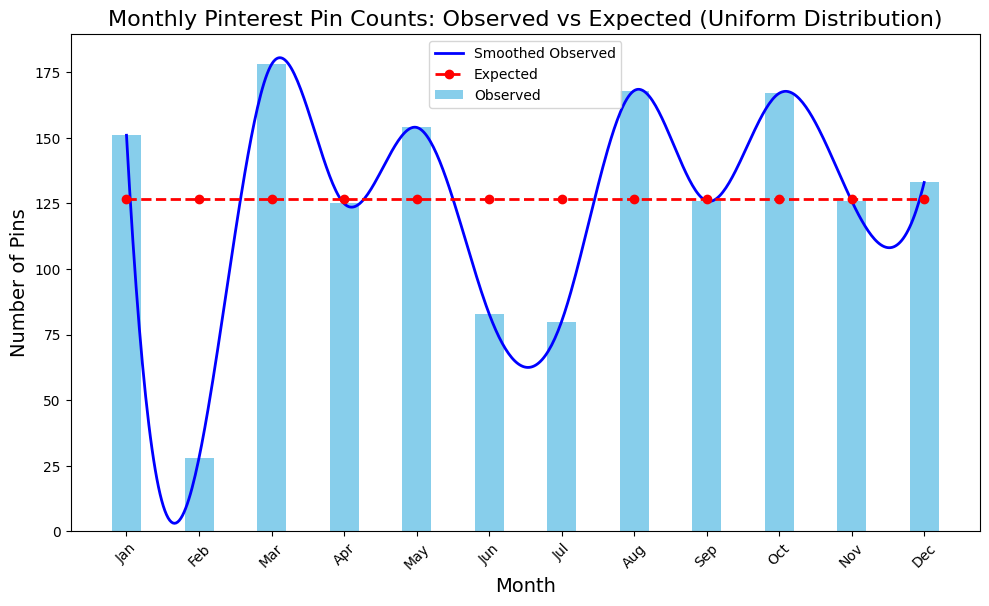

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline
import numpy as np

# Load and clean the Pinterest data
df_pins = pd.read_csv("pinterest_pins4.csv")
df_pins['Created at'] = df_pins['Created at'].str.replace('Created at: ', '').str.strip()
df_pins['Date'] = pd.to_datetime(df_pins['Created at'], format="%Y/%m/%d %H:%M:%S", errors='coerce')
df_pins = df_pins.dropna(subset=['Date'])

# Extract the 'Month' column
df_pins['Month'] = df_pins['Date'].dt.month

# Count the number of pins for each month (1 = January, 12 = December)
monthly_pin_counts = df_pins['Month'].value_counts().sort_index()

# Total number of pins in the data
total_pins = monthly_pin_counts.sum()

# Calculate the expected number of pins for each month under the null hypothesis (uniform distribution)
expected_count = total_pins / 12  # Assuming equal distribution across all months
expected_counts = [expected_count] * 12  # Equal distribution for each month (January to December)

# Prepare for plotting the comparison between observed and expected pin counts
months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]

# Align the observed and expected counts to the correct months (indexing from 0)
observed_values = [monthly_pin_counts.get(i, 0) for i in range(1, 13)]
expected_values = expected_counts

# Create a smooth curve for the observed values using spline interpolation
x = np.arange(12)  # month indices (0 to 11)
observed_spline = make_interp_spline(x, observed_values, k=3)  # k=3 for cubic spline
x_smooth = np.linspace(0, 11, 500)  # Smooth x values
observed_smooth = observed_spline(x_smooth)

# Plotting the comparison: Observed vs Expected Pin Counts by Month
plt.figure(figsize=(10, 6))

# Plot observed counts as bars
plt.bar(months, observed_values, width=0.4, label='Observed', color='skyblue', align='center')

# Plot smooth curve for observed values
plt.plot(x_smooth, observed_smooth, label='Smoothed Observed', color='blue', linewidth=2)

# Plot expected counts as a dashed line
plt.plot(months, expected_values, label='Expected', color='red', linestyle='--', marker='o', linewidth=2)

# Add labels and title
plt.title('Monthly Pinterest Pin Counts: Observed vs Expected (Uniform Distribution)', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Number of Pins', fontsize=14)
plt.legend()

# Show the plot
plt.tight_layout()
plt.savefig('monthly_activity_with_comparison.jpg', format='jpg')
plt.xticks(rotation=45)
plt.show()


## Analyzing Pinning Activity by Hour of the Day

In this step, I aimed to identify the most active times during the day when pins were created on Pinterest. The analysis focused on examining the distribution of pinning activity across different hours of the day.

**Datetime Conversion**: The 'Created at' column was converted to a `datetime` format to enable easier manipulation and extraction of the hour of the day.

**Extracting the Hour**: I extracted the hour from the datetime column (`Date`), creating a new column called `Hour` that represents the hour at which each pin was created.
**Counting Pins per Hour**: I counted the number of pins created for each hour of the day (from 0 to 23), and then sorted the results by hour.

### Plotting the Results:
The analysis was visualized using a line plot, which shows the number of pins created during each hour of the day. The plot helps identify the peak hours of activity. The graph includes:
- **X-axis**: Hours of the day (from 0 to 23).
- **Y-axis**: Number of pins created during each hour.
- **Markers**: Represent the count of pins at each hour.


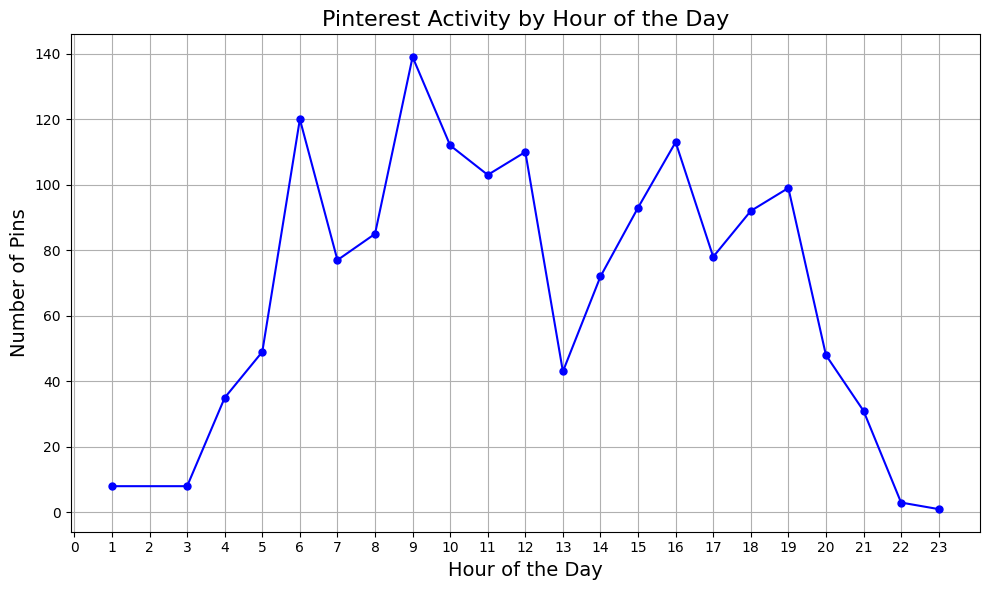

Hour
1.0       8
3.0       8
4.0      35
5.0      49
6.0     120
7.0      77
8.0      85
9.0     139
10.0    112
11.0    103
12.0    110
13.0     43
14.0     72
15.0     93
16.0    113
17.0     78
18.0     92
19.0     99
20.0     48
21.0     31
22.0      3
23.0      1
Name: count, dtype: int64


In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file containing the pin data
df_pins = pd.read_csv("pinterest_pins4.csv")

# Clean the 'Created at' column to remove 'Created at: ' and strip extra spaces
df_pins['Created at'] = df_pins['Created at'].str.replace('Created at: ', '').str.strip()

# Handle missing or invalid 'Created at' entries
df_pins = df_pins[df_pins['Created at'].notna()]  # Remove rows with missing 'Created at'

# Convert the 'Created at' column to datetime
df_pins['Date'] = pd.to_datetime(df_pins['Created at'], format='%Y/%m/%d %H:%M:%S', errors='coerce')

# Extract the hour from the 'Date' column
df_pins['Hour'] = df_pins['Date'].dt.hour

# Count the number of pins for each hour of the day
hourly_counts = df_pins['Hour'].value_counts().sort_index()

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(hourly_counts.index, hourly_counts.values, marker='o', color='b', linestyle='-', markersize=5)
plt.title('Pinterest Activity by Hour of the Day', fontsize=16)
plt.xlabel('Hour of the Day', fontsize=14)
plt.ylabel('Number of Pins', fontsize=14)
plt.grid(True)
plt.xticks(range(0, 24))
plt.tight_layout()
plt.savefig('activity_by_hour_cumulative.jpg', format='jpg')
plt.show()

# Output the counts for each hour
print(hourly_counts)


### Analyzing Pinterest Pinning Activity by Hour of the Day (2023-2024)

I analyzed the Pinterest pinning activity for the years 2023 and 2024 also to identify the most active hours of the day to see if there were major changes.


Hourly Pin Counts (2023-2025):
Hour
1      8
5      1
7      7
8      8
9     37
10    24
11    14
12     8
13     3
14     1
15    37
16    29
17    10
18    23
19    30
20    19
21    23
22     3
dtype: int64


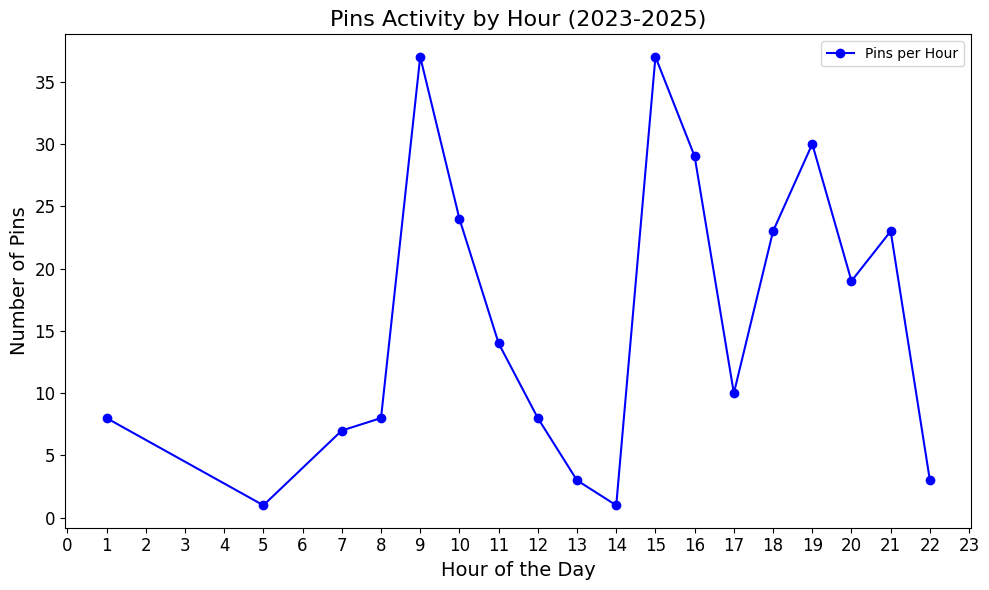

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file containing the pin data
df_pins = pd.read_csv("pinterest_pins4.csv")

# Clean the 'Created at' column to remove 'Created at: ' and strip extra spaces
df_pins['Created at'] = df_pins['Created at'].str.replace('Created at: ', '').str.strip()

# Handle missing or invalid 'Created at' entries
df_pins = df_pins[df_pins['Created at'].notna()]  # Remove rows with missing 'Created at'

# Convert 'Created at' to datetime format
df_pins['Date'] = pd.to_datetime(df_pins['Created at'], format='%Y/%m/%d %H:%M:%S', errors='coerce')

# Drop rows with invalid date conversion
df_pins = df_pins.dropna(subset=['Date'])

# Extract the year and hour
df_pins['Year'] = df_pins['Date'].dt.year
df_pins['Hour'] = df_pins['Date'].dt.hour

# Filter for years 2023, 2024, and 2025
df_filtered = df_pins[df_pins['Year'].isin([2023, 2024, 2025])]

# Count the number of pins per hour
hourly_counts = df_filtered.groupby('Hour').size()

# Print the counts for each hour
print("Hourly Pin Counts (2023-2025):")
print(hourly_counts)

# Plotting the combined data for 2023, 2024, and 2025
plt.figure(figsize=(10, 6))
plt.plot(hourly_counts.index, hourly_counts.values, marker='o', color='b', linestyle='-', label='Pins per Hour')

# Add titles and labels
plt.title('Pins Activity by Hour (2023-2025)', fontsize=16)
plt.xlabel('Hour of the Day', fontsize=14)
plt.ylabel('Number of Pins', fontsize=14)
plt.xticks(range(24), fontsize=12)
plt.yticks(fontsize=12)

# Display the plot
plt.tight_layout()
plt.savefig('Pins_Activity_by_Hour.jpg', format='jpg')
plt.legend()
plt.show()


## Analyzing Pinterest Pin Counts per Board

I analyzed the number of pins associated with each Pinterest board to see which boards I use the most.

**Data Cleaning**:
   - Cleaned the 'Board Name' column by removing unnecessary strings and spaces.
   - Filtered out unwanted board names to focus on valid boards.

**Counting Pins per Board**:
   - Counted the number of pins for each board using the cleaned 'Board Name' column.

**Merging Data**:
   - Merged the pin counts with board creation dates from the boards dataset for additional context.

**Visualization**:
   - Created a horizontal bar plot to display the number of pins per board, with annotations for each board’s creation date.


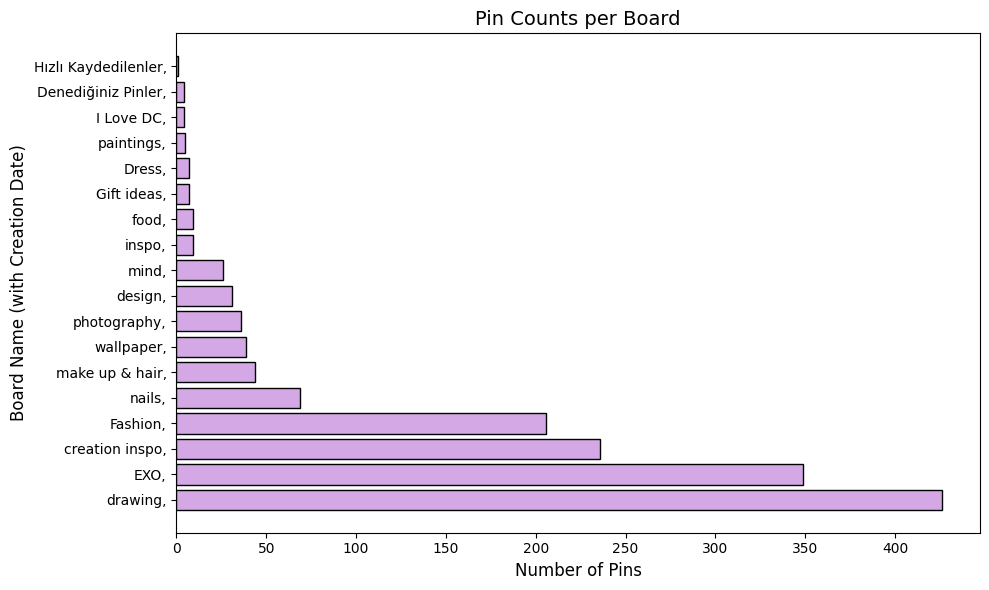

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

df_pins = pd.read_csv("pinterest_pins4.csv")

#Clean the 'Board Name' column in the Pinterest pins data
df_pins['Board Name'] = df_pins['Board Name'].str.replace('Board Name: ', '').str.strip()

#Remove rows with unwanted or invalid board names
unwanted_boards = [
    'Private: True', 'Board Id: 42573227666717508,', 'Is Native: No data',
    'Board Id: 42573227666700460,', 'No data', 'nan', 'Query: Pooteey painting on cup',
    'What action was taken: IMPRESSION', 'What action was taken: CAROUSEL_SLOT_IMPRESSION',
    'What action was taken: CLICKTHROUGH', 'Is Native: No data,', 'No data,'
]

# Filter out unwanted board names
df_pins = df_pins[~df_pins['Board Name'].isin(unwanted_boards)]

df_boards = pd.read_csv("pinterest_boards.csv")

df_boards['Created at'] = df_boards['Created at'].str.replace('Created at: ', '').str.strip()
df_boards['Board Created At'] = pd.to_datetime(df_boards['Created at'], format="%Y/%m/%d %H:%M:%S", errors='coerce')

board_pin_counts = df_pins['Board Name'].value_counts()

board_pin_data = pd.DataFrame(board_pin_counts).reset_index()
board_pin_data.columns = ['Board Name', 'Pin Count']

board_pin_data = board_pin_data.merge(df_boards[['Board Name', 'Board Created At']], on='Board Name', how='left')

plt.figure(figsize=(10, 6))

plt.barh(board_pin_data['Board Name'], board_pin_data['Pin Count'], color='#D3A8E4', edgecolor='black')

plt.title('Pin Counts per Board', fontsize=14)
plt.xlabel('Number of Pins', fontsize=12)
plt.ylabel('Board Name (with Creation Date)', fontsize=12)

for i, (board_name, creation_date) in enumerate(zip(board_pin_data['Board Name'], board_pin_data['Board Created At'])):
    if pd.notna(creation_date):
        plt.text(board_pin_data['Pin Count'][i] + 2, i, f'{creation_date.strftime("%Y-%m-%d")}', va='center', fontsize=10)

plt.tight_layout()
plt.savefig('pin_counts_per_board.jpg', format='jpg')
plt.show()


## Analyzing Pinterest Interactions by Board and Month with Heatmap

I created a heatmap to visualize how I interacted with different Pinterest boards over time (by year and month). This heatmap provides a clear view of how my pinning activity varies across boards over time, helping to identify periods of high engagement with specific boards.

**Datetime Conversion**:
   - Converted the 'Created at' column to datetime format for accurate time-based analysis.
   - Extracted the 'Year-Month' period from the 'Created at' field to facilitate grouping.

**Grouping and Counting**:
   - Grouped the data by 'Board Name' and 'Year-Month', counting the number of pins for each combination.
   - Identified the most active month for each board by finding the mode of pin counts.

**Heatmap Creation**:
   - Pivoted the data to get the number of pins for each board and month.
   - Generated a heatmap to visualize pinning activity across different months and boards.



                                               Pin URL  \
1525  https://www.pinterest.com/pin/42573158960537811/   
1526  https://www.pinterest.com/pin/42573158960941247/   
1527  https://www.pinterest.com/pin/453737731199574734   
1528  https://www.pinterest.com/pin/312366924141161056   
1529   https://www.pinterest.com/pin/42573158959251776   

                                                  Title Created at Board Name  \
1525  Note: ◦◦ pick you up if you fall to pieces, le...        NaT        NaN   
1526                         Note: Dancer sketch I did!        NaT        NaN   
1527                                     Private: False        NaT        NaN   
1528                                     Private: False        NaT        NaN   
1529                                      Private: True        NaT        NaN   

                                     Private  
1525                                     NaN  
1526        Time: 2017-03-21T04:45:04.984398  
1527                   

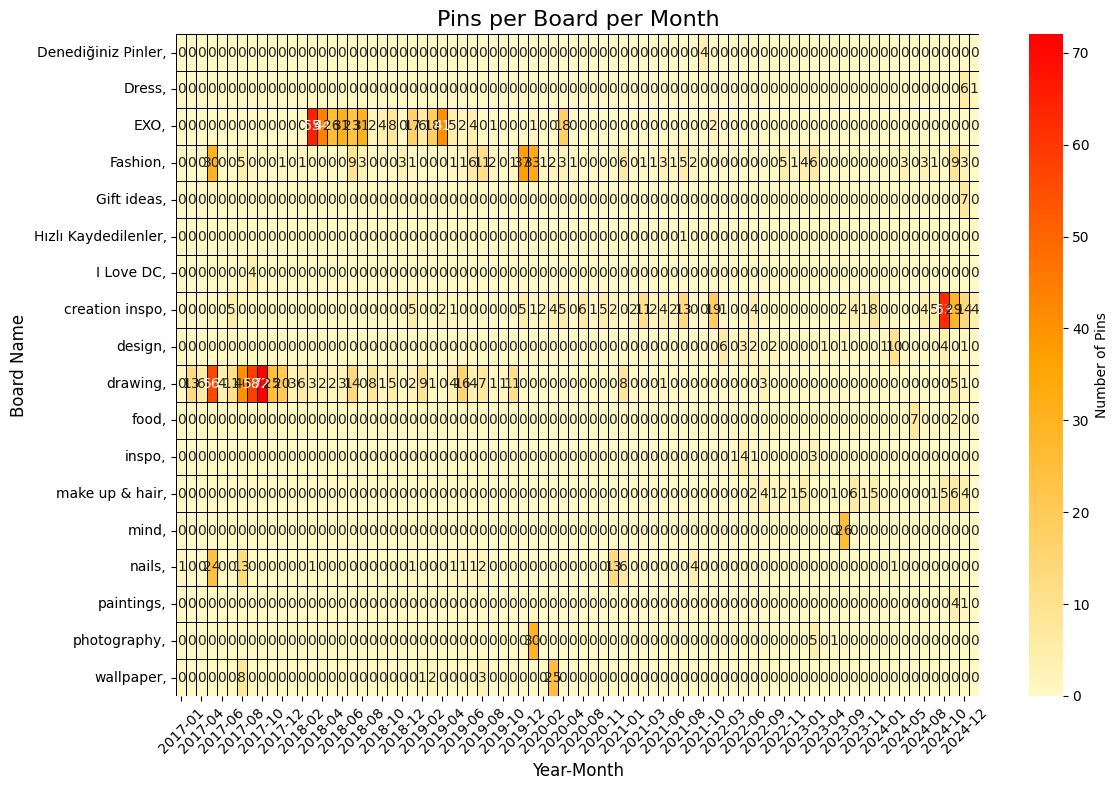

In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

df_pins = pd.read_csv("pinterest_pins4.csv")

df_pins['Board Name'] = df_pins['Board Name'].str.replace('Board Name: ', '').str.strip()

#Remove rows with unwanted or invalid board names
unwanted_boards = [
    'Private: True', 'Board Id: 42573227666717508,', 'Is Native: No data',
    'Board Id: 42573227666700460,', 'No data', 'nan', 'Query: Pooteey painting on cup',
    'What action was taken: IMPRESSION', 'What action was taken: CAROUSEL_SLOT_IMPRESSION',
    'What action was taken: CLICKTHROUGH', 'Is Native: No data,', 'No data,'
]

# Filter out unwanted board names
df_pins = df_pins[~df_pins['Board Name'].isin(unwanted_boards)]

df_pins['Created at'] = df_pins['Created at'].str.replace('Created at: ', '', regex=False)

df_pins['Created at'] = pd.to_datetime(df_pins['Created at'], errors='coerce', format="%Y/%m/%d %H:%M:%S")

# Check for any rows where conversion failed
print(df_pins[df_pins['Created at'].isnull()])

df_pins['Year-Month'] = df_pins['Created at'].dt.to_period('M')

board_month_counts = df_pins.groupby(['Board Name', 'Year-Month']).size().reset_index(name='Pin Count')

#Find the most active month for each board (mode)
most_active_month = board_month_counts.loc[board_month_counts.groupby('Board Name')['Pin Count'].idxmax()]

#Find the average month (
board_month_counts['Year-Month'] = board_month_counts['Year-Month'].dt.to_timestamp()
average_pinning_month = board_month_counts.groupby('Board Name')['Year-Month'].mean().reset_index()

print("Most Active Month for Each Board:")
print(most_active_month)

print("\nAverage Pinning Month for Each Board:")
print(average_pinning_month)

# Step 11: Format 'Year-Month' to remove time part
board_month_counts['Year-Month'] = board_month_counts['Year-Month'].dt.strftime('%Y-%m')

heatmap_data = board_month_counts.pivot_table(index='Board Name', columns='Year-Month', values='Pin Count', aggfunc='sum', fill_value=0)
heatmap_data = board_month_counts.pivot_table(index='Board Name', columns='Year-Month', values='Pin Count', aggfunc='sum', fill_value=0)

# Create the custom colormap with orange in the middle and red as max
cmap = mcolors.LinearSegmentedColormap.from_list("custom_orange_red", ["#FFF9C4", "orange", "red"])
plt.figure(figsize=(12, 8))

sns.heatmap(heatmap_data, cmap=cmap, annot=True, fmt='d', linewidths=0.5, linecolor='black',
            cbar_kws={'label': 'Number of Pins'})

plt.title('Pins per Board per Month', fontsize=16)
plt.xlabel('Year-Month', fontsize=12)
plt.ylabel('Board Name', fontsize=12)

# Rotate the x-axis labels to make them readable
plt.xticks(rotation=45)

plt.tight_layout()

plt.savefig('pins_per_board_per_month_heatmap.jpg', format='jpg')

plt.show()
